In [ ]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

# Plimpton 322 を解読する (2)

正の整数 $p$, $q$ $(p>q)$ に対して、

$$
  \begin{align}
    a & =  2 p q \\
    b & =  p^2 - q^2\\
    d & =  p^2 + q^2\\
  \end{align}
$$

とおくと、$a$, $b$, $d$ はピタゴラスの三数となり、$a^2+b^2 = d^2$ を満たす。

解) 恒等式

$$
  (x-y)^2 = (x+y)^2 - 4xy
$$

に対して $x=p^2$, $y=q^2$ とおいて $p$, $q$ を消去する。

$$
  \begin{align}
    (p^2-q^2)^2 &= (p^2+q^2)^2 - 4p^2q^2 \\
    b^2 &= d^2 - a^2
  \end{align}
$$

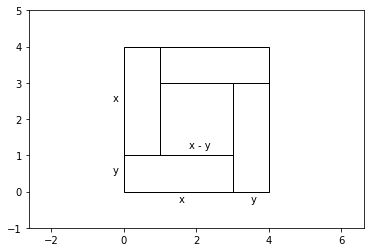

In [3]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

p0 = Polygon([(0,0), (3,0), (3,1), (0,1), ], fill=False)
p1 = Polygon([(3,0), (4,0), (4,3), (3,3), ], fill=False)
p2 = Polygon([(4,3), (4,4), (1,4), (1,3), ], fill=False)
p3 = Polygon([(1,1), (1,4), (0,4), (0,1), ], fill=False)

fig, ax = plt.subplots(1,1)

ax.add_patch(p0)
ax.add_patch(p1)
ax.add_patch(p2)
ax.add_patch(p3)
ax.axis('equal')
ax.set(xlim=(0,4),ylim=(-1,5))

plt.text(1.5,-0.3,'x')
plt.text(3.5,-0.3,'y')
plt.text(-0.3,2.5,'x')
plt.text(-0.3,0.5,'y')
plt.text(1.8,1.2, 'x - y')
plt.show()

* [ピタゴラス数の求め方とその証明 | 高校数学の美しい物語](https://manabitimes.jp/math/661)

Plimpton 322との対応は次の表の通りである:

|#1 |#2 |#3 |
|:-:|:-:|:-:|
|$$\left(\frac{d}{a}\right)^2$$|$$b$$      |$$d$$      |
|$$\frac{1}{4}\left(\frac{p}{q}+\frac{q}{p}\right)^2$$|$$p^2-q^2$$|$$p^2+q^2$$|

In [5]:
import pandas as pd
import requests

res = requests.get("https://en.wikipedia.org/wiki/Plimpton_322").text

df2=pd.read_html(res)[1]
df2

,or,Short Side,Diagonal,Row #
0,(1).9834028,119,169,1
1,(1).9491586,3367,4825,2
2,(1).9188021,4601,6649,3
3,(1).8862479,12709,18541,4
4,(1).8150077,65,97,5
5,(1).7851929,319,481,6
6,(1).7199837,2291,3541,7
7,(1).6927094,799,1249,8
8,(1).6426694,481,769,9
9,(1).5861226,4961,8161,10


命題) Plimpton 322は、互いに素な正の整数 $p$, $q$ のうち、

$$
  \frac{9}{5} \leq \frac{p}{q} \leq \frac{12}{5}
$$

を満たす組み合わせについて、

$$
\frac{d}{a} = \frac{1}{2}\left(\frac{p}{q}+\frac{q}{p}\right)
$$

をキーとして降順に並べたものである。

補足: 

|#1 |#2 |#3 |
|:-:|:-:|:-:|
|$$\left(\frac{d}{a}\right)^2$$|$$b$$      |$$d$$      |
|$$\frac{1}{4}\left(\frac{p}{q}+\frac{q}{p}\right)^2$$|$$p^2-q^2$$|$$p^2+q^2$$|
|$$1+{v_{1}}^2 = {v_{4}}^2$$|$$a\cdot v_{1}$$|$$a\cdot v_{4}$$|
|$$1+\left(\frac{c}{2}\right)^2$$|$$\frac{a}{2}\left(x-\frac{1}{x}\right)$$|$$\frac{a}{2}\left(x+\frac{1}{x}\right)$$|

補足2: Plimpton 322の欠落?

|.  |.  |.  |.  |
|:-:|:-:|:-:|:-:|
|$$\frac{d+b}{a}$$|$$\frac{d-b}{a}$$|$$2 \frac{b}{a}$$|$$a$$|
|$$\frac{p}{q}$$|$$\frac{q}{p}$$|$$\frac{p}{q}-\frac{q}{p}$$|$$2qp$$|
|$$v_{4}+v_{1}$$|$$v_{4}-v_{1}$$|$$2\cdot v_{1}$$|$$a$$|
|$$x$$|$$\frac{1}{x}$$|$$c=x-\frac{1}{x}$$|$$a$$|